<a href="https://colab.research.google.com/github/Seeratijaz/Final_Project_kidney_diesese_Classification/blob/main/CKD_Classification_Using_ML_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [7]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Importing the Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Final Project /kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# Data Statistics

In [3]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# Data Types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

# Renaming the Columns for Better Understanding

In [5]:
# Creating a dictionary to map short names to full names
column_names = {
    'age': 'Age',
    'bp': 'Blood Pressure',
    'sg': 'Specific Gravity',
    'al': 'Albumin',
    'su': 'Sugar',
    'rbc': 'Red Blood Cells',
    'pc': 'Pus Cell',
    'pcc': 'Pus Cell Clumps',
    'ba': 'Bacteria',
    'bgr': 'Blood Glucose Random',
    'bu': 'Blood Urea',
    'sc': 'Serum Creatinine',
    'sod': 'Sodium',
    'pot': 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed Cell Volume',
    'wbcc': 'White Blood Cell Count',
    'rbcc': 'Red Blood Cell Count',
    'htn': 'Hypertension',
    'dm': 'Diabetes Mellitus',
    'cad': 'Coronary Artery Disease',
    'appet': 'Appetite',
    'pe': 'Pedal Edema',
    'ane': 'Anemia',
    'class': 'Chronic Kidney Disease'
}

# Renaming columns in the dataframe
df.rename(columns=column_names, inplace=True)


# Display the combined dataframe
df.head()

,id,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,...,Packed Cell Volume,wc,rc,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# NULL Values Analysis

In [6]:
# Analyzing null values in the DataFrame
null_values_summary = df.isnull().sum()
null_values_percentage = (df.isnull().mean() * 100).round(2)

# Creating a DataFrame for better visualization
null_values_analysis = pd.DataFrame({
    'Number of Null Values': null_values_summary,
    'Percentage of Null Values': null_values_percentage
})

# Display the null values analysis
print(null_values_analysis)

                         Number of Null Values  Percentage of Null Values
id                                           0                       0.00
Age                                          9                       2.25
Blood Pressure                              12                       3.00
Specific Gravity                            47                      11.75
Albumin                                     46                      11.50
Sugar                                       49                      12.25
Red Blood Cells                            152                      38.00
Pus Cell                                    65                      16.25
Pus Cell Clumps                              4                       1.00
Bacteria                                     4                       1.00
Blood Glucose Random                        44                      11.00
Blood Urea                                  19                       4.75
Serum Creatinine                      

# Dealing with Null values in Categorical Columns

In [8]:
# Identifying categorical columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Display the names of the categorical columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria',
       'Packed Cell Volume', 'wc', 'rc', 'Hypertension', 'Diabetes Mellitus',
       'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia',
       'classification'],
      dtype='object')


In [11]:
# Initializing the SimpleImputer with the most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')

# Loop through each categorical column and apply the imputer
for col in ['Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria',
            'Packed Cell Volume', 'wc', 'rc', 'Hypertension',
            'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
            'Pedal Edema', 'Anemia', 'classification']:
    df[col] = imputer.fit_transform(df[[col]]).ravel()

# Dealing with Null values in Numerical Columns

In [12]:
# Initializing the SimpleImputer with the mean strategy for numerical columns
num_imputer = SimpleImputer(strategy='mean')

# Identifying numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column and apply the imputer
for col in numerical_columns:
    df[col] = num_imputer.fit_transform(df[[col]]).ravel()

In [13]:
# Analyzing null values in the DataFrame
null_values_summary = df.isnull().sum()
null_values_percentage = (df.isnull().mean() * 100).round(2)

# Creating a DataFrame for better visualization
null_values_analysis = pd.DataFrame({
    'Number of Null Values': null_values_summary,
    'Percentage of Null Values': null_values_percentage
})

# Display the null values analysis
print(null_values_analysis)

                         Number of Null Values  Percentage of Null Values
id                                           0                        0.0
Age                                          0                        0.0
Blood Pressure                               0                        0.0
Specific Gravity                             0                        0.0
Albumin                                      0                        0.0
Sugar                                        0                        0.0
Red Blood Cells                              0                        0.0
Pus Cell                                     0                        0.0
Pus Cell Clumps                              0                        0.0
Bacteria                                     0                        0.0
Blood Glucose Random                         0                        0.0
Blood Urea                                   0                        0.0
Serum Creatinine                      

# Data Cleaning

In [16]:
# Printing the list of all unique values in each categorical column
for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].unique()}")
    print("\n")

Column: Red Blood Cells
Unique Values: ['normal' 'abnormal']


Column: Pus Cell
Unique Values: ['normal' 'abnormal']


Column: Pus Cell Clumps
Unique Values: ['notpresent' 'present']


Column: Bacteria
Unique Values: ['notpresent' 'present']


Column: Packed Cell Volume
Unique Values: ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' '41' '16' '24' '37'
 '30' '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46'
 '23' '19' '25' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']


Column: wc
Unique Values: ['7800' '6000' '7500' '6700' '7300' '9800' '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300' '7200'
 '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200

In [17]:
# Cleaning data in specific categorical columns
columns_to_clean = ['Packed Cell Volume', 'wc', 'rc', 'Diabetes Mellitus',
                    'Coronary Artery Disease', 'classification']

# Applying cleaning operations to remove unwanted characters and spaces
for col in columns_to_clean:
    df[col] = df[col].astype(str).str.strip().str.replace('\t', '').str.replace('?', '')

# Converting columns to appropriate data types where necessary
df['Packed Cell Volume'] = pd.to_numeric(df['Packed Cell Volume'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

# Checking for unique values again to verify normalization
for col in columns_to_clean:
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].unique()}")
    print("\n")

Column: Packed Cell Volume
Unique Values: [44. 38. 31. 32. 35. 39. 36. 33. 29. 28. 41. 16. 24. 37. 30. 34. 40. 45.
 27. 48. nan 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.]


Column: wc
Unique Values: [ 7800.  6000.  7500.  6700.  7300.  9800.  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.  7200.
  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200. 12500.
  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600. 10200.
  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.  4700.
 10900.  8100.  9500.  2200. 12800. 11200. 19100.    nan 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700.
 11500.  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]


Column: rc
Unique Values: [5.2 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5 4.2
 4.5 3.1 4.7 

# EDA

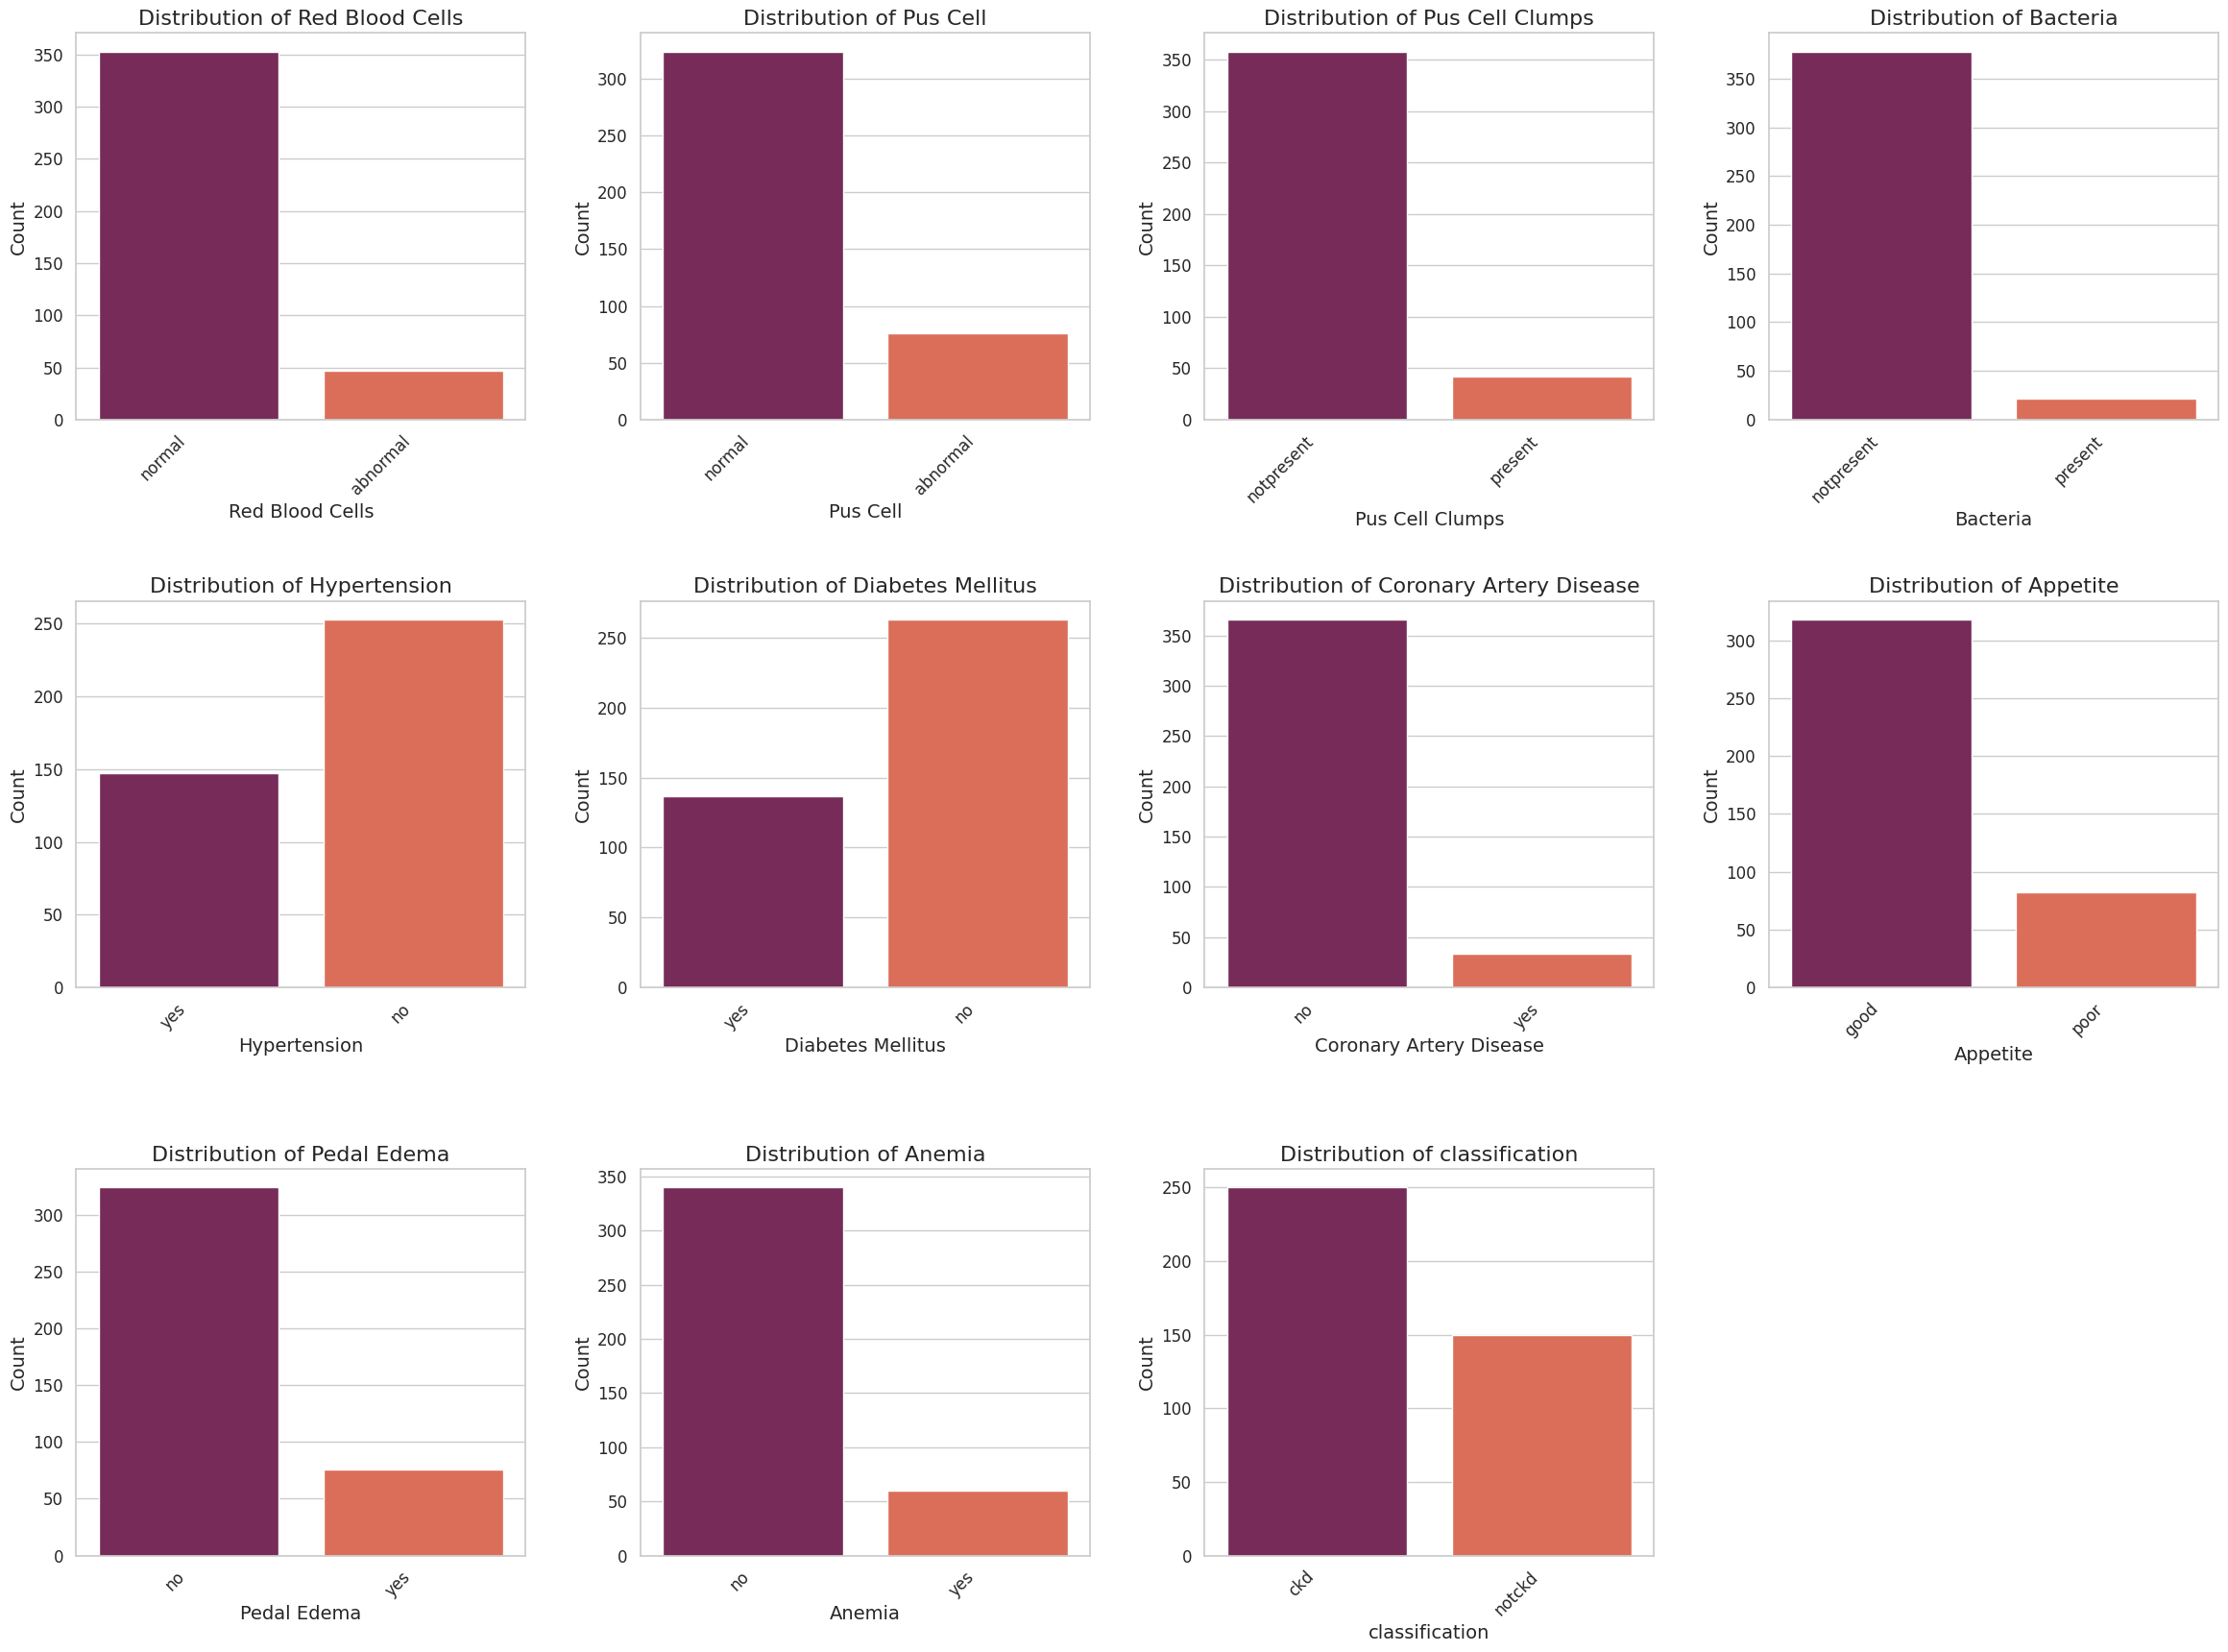

In [21]:
# Extracting categorical columns from the DataFrame
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
# Setting the style and font size for better quality and visibility
sns.set(style="whitegrid")
plt.figure(figsize=(24, 18))
plotnumber = 1

# Loop through categorical columns to create count plots
for column in categorical_columns:
    if plotnumber <= len(categorical_columns):  # Ensure it only iterates over existing columns
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data=df, x=column, hue = column, palette='rocket')
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.yticks(fontsize=12)
        ax.set_title(f'Distribution of {column}', fontsize=16)
        plotnumber += 1

plt.tight_layout(pad=3.0)
plt.show()
